In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('KDDTrain+.txt', header=None)
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [3]:
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

Training data has 125973 rows & 43 columns


In [4]:
# Descriptive statistics
train.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
test = pd.read_csv('KDDTest+.txt', header=None)
test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [6]:
print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

Testing data has 22544 rows & 43 columns


In [7]:
# Descriptive statistics
test.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
#Reset column names for training set
train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

In [9]:
# Attack Class Distribution
train['subclass'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: subclass, dtype: int64

In [10]:
#Reset column names for testing set
test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

In [11]:
# Attack Class Distribution
test['subclass'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
perl                  2
phf                   2
udpstorm              2
loadmodule            2
sqlattack             2
worm                  2
imap                  1
Name: subclass, dtype: int64

In [12]:
train_names = train.columns #  column names of train data
train_names

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [13]:
test_names = test.columns #  column names of test data
test_names

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [14]:
# drop difficulty_level column from training data beacuse it is not a feature that can help us to predict the ttack type
train = train.drop('difficulty_level', 1) 
train.shape

(125973, 42)

In [15]:
# drop difficulty_level column from testing data beacuse it is not a feature that can help us to predict the ttack type
test = test.drop('difficulty_level', 1) 
test.shape

(22544, 42)

In [16]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [17]:
# select the Categorical to convert it by using one-hot encoding
cat_cols = ['protocol_type','service','flag']
cat_cols

['protocol_type', 'service', 'flag']

In [18]:
#Merging training and testing data to handel one-hot encoding one time 
train1 = train.copy()
test1 = test.copy()
merged_data = pd.concat([train1,test1])

In [19]:
#this function handel One-hot encoding for the given columns
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

In [20]:
#one hot encoding function to Merged the data
merged_data = one_hot(merged_data,cat_cols)

In [21]:
train.shape

(125973, 42)

In [22]:
test.shape


(22544, 42)

In [23]:
merged_data.shape

(148517, 123)

In [24]:
merged_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
mergedClasses = merged_data.pop('subclass')

In [26]:
#Fixing labels for training set to 5 classes 
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for item in mergedClasses:
    if item in check1:
        classlist.append("DoS")
    elif item in check2:
        classlist.append("Probe")
    elif item in check3:
        classlist.append("U2R")
    elif item in check4:
        classlist.append("R2L")
    else:
        classlist.append("Normal")

In [27]:
merged_data.shape

(148517, 122)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
sc_merged_data = scaler.fit_transform(merged_data)


In [29]:
#Appending Class column to SCtraining set
merged_data["class"] = classlist

In [30]:
merged_data['class'].value_counts()

Normal    77232
DoS       53387
Probe     14077
R2L        3702
U2R         119
Name: class, dtype: int64

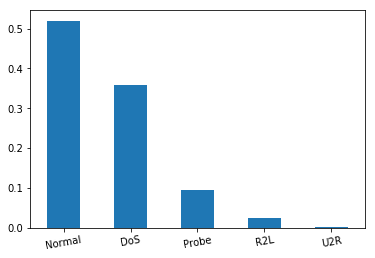

In [31]:
import matplotlib.pyplot as plt
prob = merged_data['class'].value_counts(normalize=True)
prob.plot(kind='bar')
plt.xticks(rotation=10)
plt.show()

In [32]:
merged_data['class'] = merged_data['class'].astype('str').values
merged_data['class'] = merged_data['class'].astype('category').values
merged_data['class'] = merged_data['class'].cat.codes
merged_data['class'].value_counts()

1    77232
0    53387
2    14077
3     3702
4      119
Name: class, dtype: int64

In [33]:
merged_data.shape

(148517, 123)

In [34]:
#retrieving the train and test datafram from merged datafram
new_trainData = merged_data.iloc[:125973]
new_testData = merged_data.iloc[125973:]

In [35]:
new_trainData.shape, new_testData.shape

((125973, 123), (22544, 123))

In [36]:
trainClasses = new_trainData.pop('class')
testClasses = new_testData.pop('class')

In [37]:
new_trainData.shape, new_testData.shape

((125973, 122), (22544, 122))

In [38]:
Y_train = trainClasses
X_train = new_trainData

In [39]:
Y_test = testClasses
X_test = new_testData

In [40]:
X_train.shape, X_test.shape

((125973, 122), (22544, 122))

In [41]:
Y_test.value_counts()

1    9889
0    7460
3    2707
2    2421
4      67
Name: class, dtype: int64

# Deep Learning (class weights = 'balanced')


In [42]:
input_dim = X_train.shape[1]  # Number of features

input_dim

122

In [43]:
from keras import layers
from keras.models import Sequential

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tenso

In [44]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

In [45]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,285
Trainable params: 1,285
Non-trainable params: 0
_________________________________________________________________


In [46]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_train),
                                                 Y_train)

class_weights

array([5.48579267e-01, 3.74123517e-01, 2.16151338e+00, 2.53212060e+01,
       4.84511538e+02])

In [47]:
history = model.fit(X_train, Y_train, class_weight=class_weights,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, testClasses),
                    batch_size=10)

Train on 125973 samples, validate on 22544 samples
Epoch 1/15
125973/125973 [==============================] - 11s 89us/step - loss: 0.3729 - acc: 0.9101 - val_loss: 2.1735 - val_acc: 0.7693
Epoch 2/15
125973/125973 [==============================] - 11s 87us/step - loss: 0.2827 - acc: 0.9334 - val_loss: 2.8750 - val_acc: 0.7648
Epoch 3/15
125973/125973 [==============================] - 11s 87us/step - loss: 0.2768 - acc: 0.9457 - val_loss: 2.5163 - val_acc: 0.7652
Epoch 4/15
125973/125973 [==============================] - 11s 87us/step - loss: 0.2584 - acc: 0.9409 - val_loss: 2.3994 - val_acc: 0.7884
Epoch 5/15
125973/125973 [==============================] - 11s 87us/step - loss: 0.2901 - acc: 0.9474 - val_loss: 2.3978 - val_acc: 0.7763
Epoch 6/15
125973/125973 [==============================] - 11s 87us/step - loss: 0.1700 - acc: 0.9337 - val_loss: 2.7877 - val_acc: 0.7662
Epoch 7/15
125973/125973 [==============================] - 11s 87us/step - loss: 0.1298 - acc: 0.9464 - val_

In [49]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, testClasses, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9664
Testing Accuracy:  0.7542


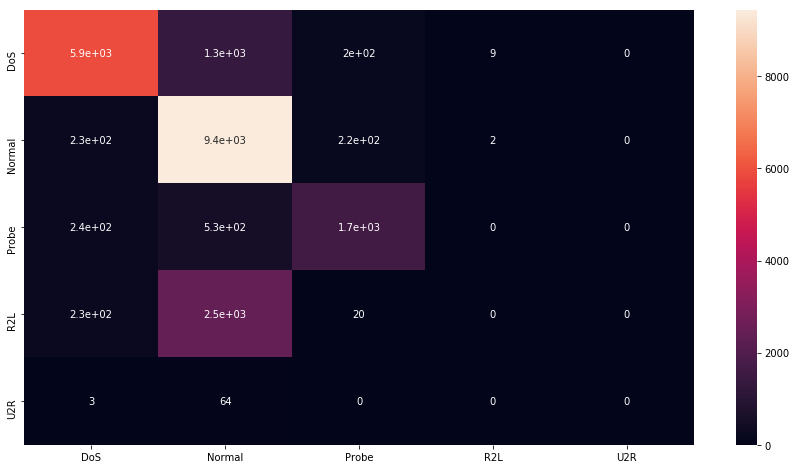

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict_classes(X_test)

cm =confusion_matrix(testClasses, y_pred)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [52]:
ynew = model.predict_classes(X_test)
print(confusion_matrix(testClasses,ynew))
print(classification_report(testClasses,ynew))
print(accuracy_score(testClasses, ynew))

[[5905 1342  204    9    0]
 [ 227 9443  217    2    0]
 [ 236  531 1654    0    0]
 [ 233 2454   20    0    0]
 [   3   64    0    0    0]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7460
           1       0.68      0.95      0.80      9889
           2       0.79      0.68      0.73      2421
           3       0.00      0.00      0.00      2707
           4       0.00      0.00      0.00        67

    accuracy                           0.75     22544
   macro avg       0.47      0.49      0.47     22544
weighted avg       0.68      0.75      0.71     22544

0.7541696238466998


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
deep_Learning_w_report = classification_report(testClasses,ynew, output_dict=True )


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
deep_Learning_w_accuracy = deep_Learning_w_report['accuracy']
deep_Learning_w_precision =  deep_Learning_w_report['weighted avg']['precision'] 
deep_Learning_w_recall = deep_Learning_w_report['weighted avg']['recall']    
deep_Learning_w_f1 = deep_Learning_w_report['weighted avg']['f1-score']
print(deep_Learning_w_accuracy,deep_Learning_w_precision,deep_Learning_w_recall,deep_Learning_w_f1)

0.7541696238466998 0.6800896712648395 0.7541696238466998 0.7057526150913095


# Deep Learning

In [57]:
model2 = Sequential()
model2.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model2.add(layers.Dense(5, activation='sigmoid'))

In [58]:
model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
Total params: 1,285
Trainable params: 1,285
Non-trainable params: 0
_________________________________________________________________


In [59]:
history2 = model2.fit(X_train, Y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, testClasses),
                    batch_size=10)

Train on 125973 samples, validate on 22544 samples
Epoch 1/15
125973/125973 [==============================] - 11s 90us/step - loss: 0.7314 - acc: 0.8993 - val_loss: 2.7528 - val_acc: 0.7437
Epoch 2/15
125973/125973 [==============================] - 11s 88us/step - loss: 0.3296 - acc: 0.9387 - val_loss: 3.1524 - val_acc: 0.7417
Epoch 3/15
125973/125973 [==============================] - 11s 88us/step - loss: 0.3297 - acc: 0.9457 - val_loss: 3.1162 - val_acc: 0.7563
Epoch 4/15
125973/125973 [==============================] - 11s 88us/step - loss: 0.3187 - acc: 0.9483 - val_loss: 3.0944 - val_acc: 0.7538
Epoch 5/15
125973/125973 [==============================] - 11s 88us/step - loss: 0.3526 - acc: 0.9494 - val_loss: 3.2076 - val_acc: 0.7398
Epoch 6/15
125973/125973 [==============================] - 11s 89us/step - loss: 0.3178 - acc: 0.9556 - val_loss: 3.5839 - val_acc: 0.7310
Epoch 7/15
125973/125973 [==============================] - 11s 88us/step - loss: 0.3092 - acc: 0.9576 - val_

In [60]:
loss, accuracy = model2.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, testClasses, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9509
Testing Accuracy:  0.6958


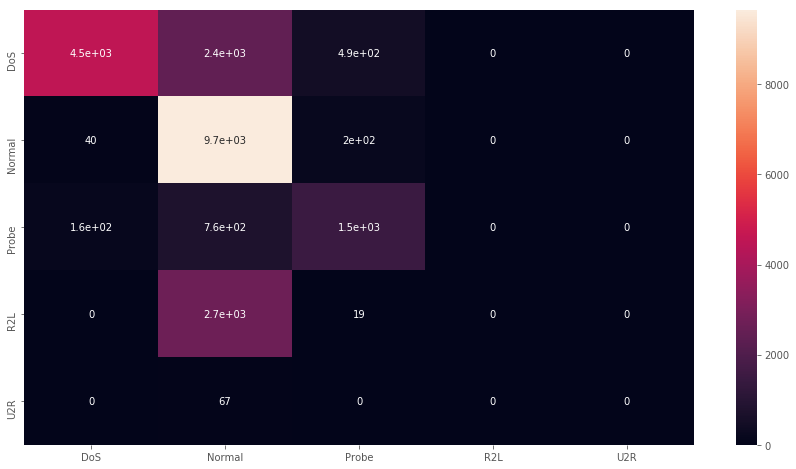

In [61]:
y_pred2 = model2.predict_classes(X_test)

cm =confusion_matrix(testClasses, y_pred2)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [62]:
ynew2 = model2.predict_classes(X_test)
print(confusion_matrix(testClasses,ynew2))
print(classification_report(testClasses,ynew2))
print(accuracy_score(testClasses, ynew2))

[[4538 2434  488    0    0]
 [  40 9651  198    0    0]
 [ 165  758 1498    0    0]
 [   0 2688   19    0    0]
 [   0   67    0    0    0]]
              precision    recall  f1-score   support

           0       0.96      0.61      0.74      7460
           1       0.62      0.98      0.76      9889
           2       0.68      0.62      0.65      2421
           3       0.00      0.00      0.00      2707
           4       0.00      0.00      0.00        67

    accuracy                           0.70     22544
   macro avg       0.45      0.44      0.43     22544
weighted avg       0.66      0.70      0.65     22544

0.6958392476933996


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
deep_Learning_report = classification_report(testClasses,ynew2, output_dict=True )


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
deep_Learning_accuracy = deep_Learning_report['accuracy']
deep_Learning_precision =  deep_Learning_report['weighted avg']['precision'] 
deep_Learning_recall = deep_Learning_report['weighted avg']['recall']    
deep_Learning_f1 = deep_Learning_report['weighted avg']['f1-score']
print(deep_Learning_accuracy,deep_Learning_precision,deep_Learning_recall,deep_Learning_f1)

0.6958392476933996 0.6610386492963747 0.6958392476933996 0.6478983094023744


# LogisticRegression model

In [65]:
# Train LogisticRegression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
logreg.fit(X_train, Y_train)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.64


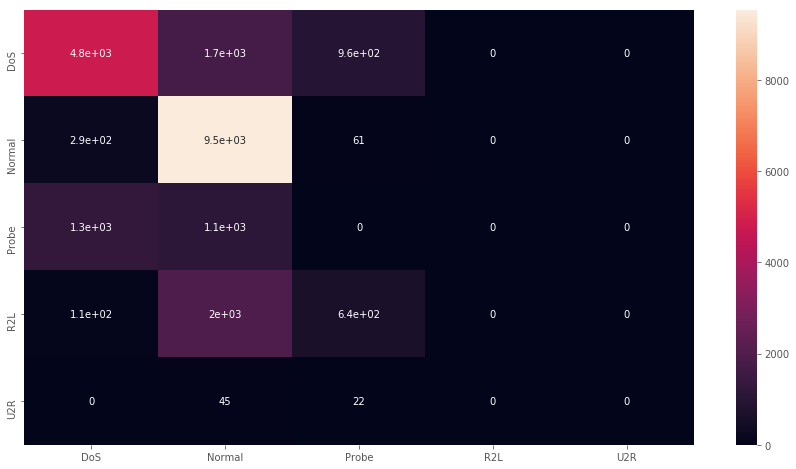

In [68]:
y_pred3 = logreg.predict(X_test)

cm =confusion_matrix(testClasses, y_pred3)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [70]:
ynew3 = logreg.predict(X_test)
print(confusion_matrix(testClasses,ynew3))
print(classification_report(testClasses,ynew3))
print(accuracy_score(testClasses, ynew3))


[[4787 1716  957    0    0]
 [ 287 9541   61    0    0]
 [1276 1145    0    0    0]
 [ 106 1956  645    0    0]
 [   0   45   22    0    0]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      7460
           1       0.66      0.96      0.79      9889
           2       0.00      0.00      0.00      2421
           3       0.00      0.00      0.00      2707
           4       0.00      0.00      0.00        67

    accuracy                           0.64     22544
   macro avg       0.28      0.32      0.29     22544
weighted avg       0.54      0.64      0.57     22544

0.6355571327182399


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
LR_report = classification_report(testClasses,ynew3, output_dict=True )


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
LR_accuracy = LR_report['accuracy']
LR_precision =  LR_report['weighted avg']['precision'] 
LR_recall = LR_report['weighted avg']['recall']    
LR_f1 = LR_report['weighted avg']['f1-score']
print(LR_accuracy,LR_precision,LR_recall,LR_f1)

0.6355571327182399 0.5359399931500824 0.6355571327182399 0.5722336804011785


# LogisticRegression model (class weights = 'balanced')

In [77]:
logreg_w = LogisticRegression(random_state=0, class_weight='balanced')

In [78]:
logreg_w.fit(X_train, Y_train)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg_w.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg_w.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.44


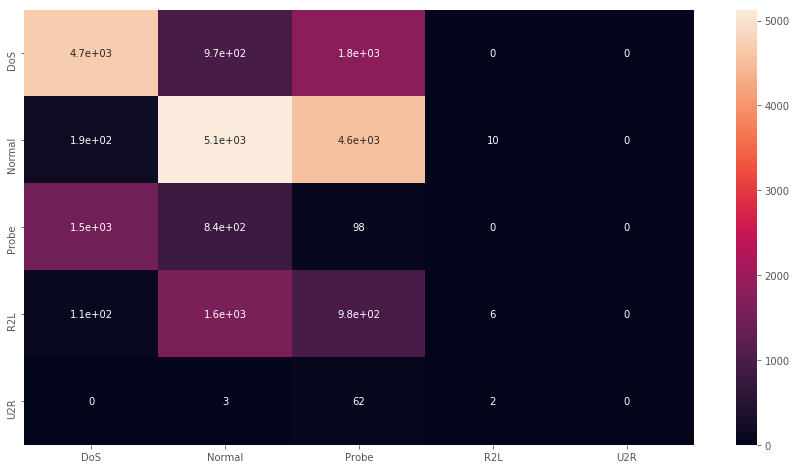

In [80]:
y_pred4 = logreg_w.predict(X_test)

cm =confusion_matrix(testClasses, y_pred4)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [81]:
ynew4 = logreg_w.predict(X_test)
print(confusion_matrix(testClasses,ynew4))
print(classification_report(testClasses,ynew4))
print(accuracy_score(testClasses, ynew4))


[[4693  973 1794    0    0]
 [ 194 5125 4560   10    0]
 [1484  839   98    0    0]
 [ 113 1611  977    6    0]
 [   0    3   62    2    0]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      7460
           1       0.60      0.52      0.56      9889
           2       0.01      0.04      0.02      2421
           3       0.33      0.00      0.00      2707
           4       0.00      0.00      0.00        67

    accuracy                           0.44     22544
   macro avg       0.33      0.24      0.25     22544
weighted avg       0.54      0.44      0.47     22544

0.44011710432931156


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
LR_w_report = classification_report(testClasses,ynew4, output_dict=True )


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
LR_w_accuracy = LR_w_report['accuracy']
LR_w_precision =  LR_w_report['weighted avg']['precision'] 
LR_w_recall = LR_w_report['weighted avg']['recall']    
LR_w_f1 = LR_w_report['weighted avg']['f1-score']
print(LR_w_accuracy,LR_w_precision,LR_w_recall,LR_w_f1)

0.44011710432931156 0.5438405052042661 0.44011710432931156 0.4692221838057486


# DecisionTreeClassifier model

In [82]:
# Train DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
print('Accuracy of DecisionTreeClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

Accuracy of DecisionTreeClassifier on training set: 1.00
Accuracy of DecisionTreeClassifier on test set: 0.77


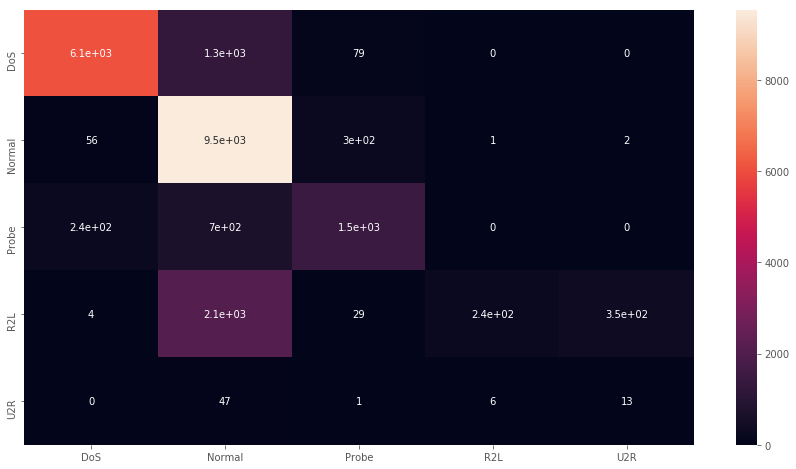

In [84]:
y_pred5 = clf.predict(X_test)

cm =confusion_matrix(testClasses, y_pred5)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [85]:
ynew5 = clf.predict(X_test)
print(confusion_matrix(testClasses,ynew5))
print(classification_report(testClasses,ynew5))
print(accuracy_score(testClasses, ynew5))


[[6098 1283   79    0    0]
 [  56 9533  297    1    2]
 [ 239  697 1485    0    0]
 [   4 2086   29  239  349]
 [   0   47    1    6   13]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7460
           1       0.70      0.96      0.81      9889
           2       0.79      0.61      0.69      2421
           3       0.97      0.09      0.16      2707
           4       0.04      0.19      0.06        67

    accuracy                           0.77     22544
   macro avg       0.69      0.54      0.52     22544
weighted avg       0.82      0.77      0.74     22544

0.7704045422285308


In [89]:
clf_report = classification_report(testClasses,ynew5, output_dict=True )

In [106]:
clf_accuracy = clf_report['accuracy']
clf_precision =  clf_report['weighted avg']['precision'] 
clf_recall = clf_report['weighted avg']['recall']    
clf_f1 = clf_report['weighted avg']['f1-score']
print(clf_accuracy,clf_precision,clf_recall,clf_f1)

0.7704045422285308 0.8229805516526068 0.7704045422285308 0.740185481221257


# DecisionTreeClassifier model (class weights = 'balanced')

In [91]:
clf2 = DecisionTreeClassifier(class_weight='balanced')
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
print('Accuracy of DecisionTreeClassifier on training set: {:.2f}'
     .format(clf2.score(X_train, Y_train)))
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'
     .format(clf2.score(X_test, Y_test)))

Accuracy of DecisionTreeClassifier on training set: 1.00
Accuracy of DecisionTreeClassifier on test set: 0.75


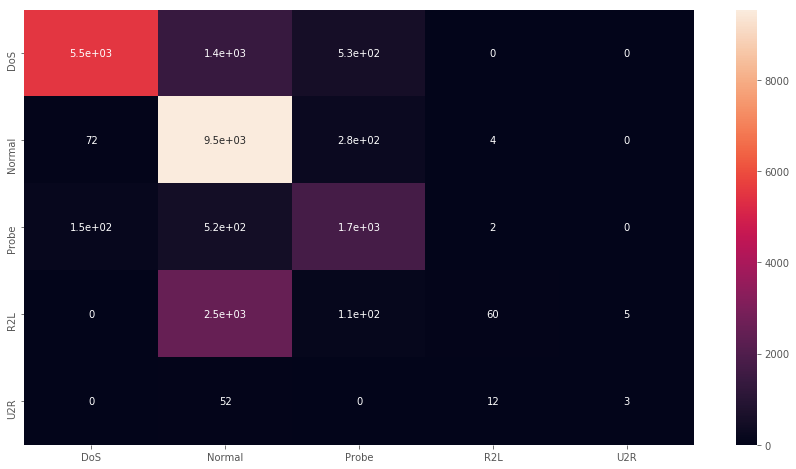

In [93]:
y_pred6 = clf2.predict(X_test)

cm =confusion_matrix(testClasses, y_pred6)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [94]:
ynew6 = clf2.predict(X_test)
print(confusion_matrix(testClasses,ynew6))
print(classification_report(testClasses,ynew6))
print(accuracy_score(testClasses, ynew6))


[[5546 1388  526    0    0]
 [  72 9530  283    4    0]
 [ 154  520 1745    2    0]
 [   0 2528  114   60    5]
 [   0   52    0   12    3]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      7460
           1       0.68      0.96      0.80      9889
           2       0.65      0.72      0.69      2421
           3       0.77      0.02      0.04      2707
           4       0.38      0.04      0.08        67

    accuracy                           0.75     22544
   macro avg       0.69      0.50      0.49     22544
weighted avg       0.78      0.75      0.71     22544

0.7489354151880766


In [95]:
clf2_report = classification_report(testClasses,ynew6, output_dict=True )

In [105]:
clf2_accuracy = clf2_report['accuracy']
clf2_precision =  clf2_report['weighted avg']['precision'] 
clf2_recall = clf2_report['weighted avg']['recall']    
clf2_f1 = clf2_report['weighted avg']['f1-score']
print(clf2_accuracy,clf2_precision,clf2_recall,clf2_f1)

0.7489354151880766 0.7798851034348945 0.7489354151880766 0.7061687916768513


# KNeighborsClassifier model

In [97]:
# Train KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [98]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.74


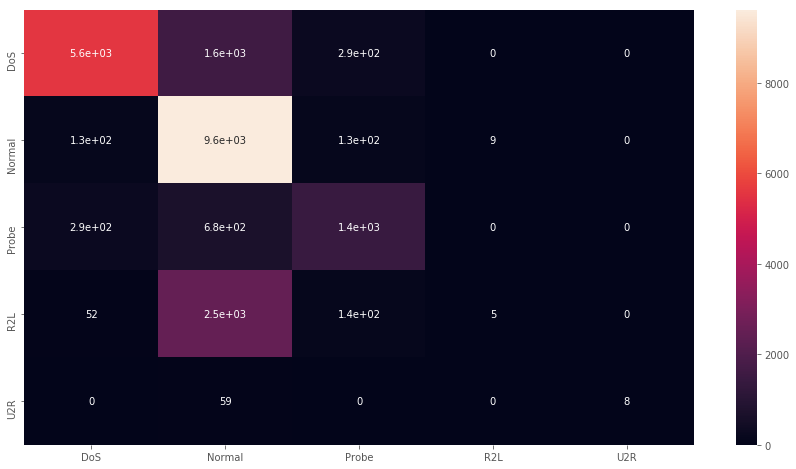

In [101]:
y_pred7 = knn.predict(X_test)

cm =confusion_matrix(testClasses, y_pred7)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [100]:
ynew7 = knn.predict(X_test)
print(confusion_matrix(testClasses,ynew7))
print(classification_report(testClasses,ynew7))
print(accuracy_score(testClasses, ynew7))

[[5565 1602  293    0    0]
 [ 130 9617  133    9    0]
 [ 294  680 1447    0    0]
 [  52 2509  141    5    0]
 [   0   59    0    0    8]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.82      7460
           1       0.66      0.97      0.79      9889
           2       0.72      0.60      0.65      2421
           3       0.36      0.00      0.00      2707
           4       1.00      0.12      0.21        67

    accuracy                           0.74     22544
   macro avg       0.73      0.49      0.50     22544
weighted avg       0.72      0.74      0.69     22544

0.7382008516678495


In [102]:
knn_report = classification_report(testClasses,ynew7, output_dict=True )

In [104]:
knn_accuracy = knn_report['accuracy']
knn_precision =  knn_report['weighted avg']['precision'] 
knn_recall = knn_report['weighted avg']['recall']    
knn_f1 = knn_report['weighted avg']['f1-score']
print(knn_accuracy,knn_precision,knn_recall,knn_f1)

0.7382008516678495 0.7194441219647172 0.7382008516678495 0.6903523561681165


# LinearDiscriminantAnalysis model

In [114]:
# Train LinearDiscriminantAnalysis model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [115]:
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [116]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.76


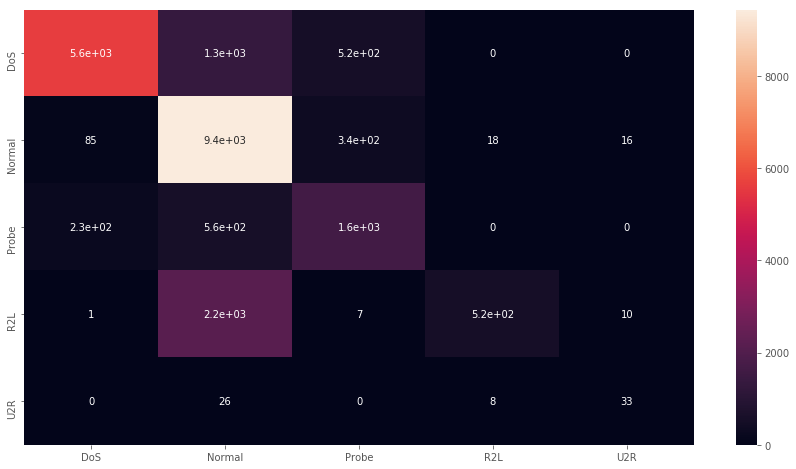

In [124]:
y_pred8 = lda.predict(X_test)

cm =confusion_matrix(testClasses, y_pred8)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [117]:
ynew8 = lda.predict(X_test)
print(confusion_matrix(testClasses,ynew8))
print(classification_report(testClasses,ynew8))
print(accuracy_score(testClasses, ynew8))

[[5605 1330  525    0    0]
 [  85 9427  343   18   16]
 [ 228  562 1631    0    0]
 [   1 2164    7  525   10]
 [   0   26    0    8   33]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7460
           1       0.70      0.95      0.81      9889
           2       0.65      0.67      0.66      2421
           3       0.95      0.19      0.32      2707
           4       0.56      0.49      0.52        67

    accuracy                           0.76     22544
   macro avg       0.76      0.61      0.63     22544
weighted avg       0.81      0.76      0.74     22544

0.7638839602555003


In [125]:
lda_report = classification_report(testClasses,ynew8, output_dict=True )

In [126]:
lda_accuracy = lda_report['accuracy']
lda_precision =  lda_report['weighted avg']['precision'] 
lda_recall = lda_report['weighted avg']['recall']    
lda_f1 = lda_report['weighted avg']['f1-score']
print(lda_accuracy,lda_precision,lda_recall,lda_f1)

0.7638839602555003 0.8054258580743218 0.7638839602555003 0.7420810984332737


# GaussianNB

In [119]:
# Train GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [120]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [121]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.39
Accuracy of Logistic regression classifier on test set: 0.29


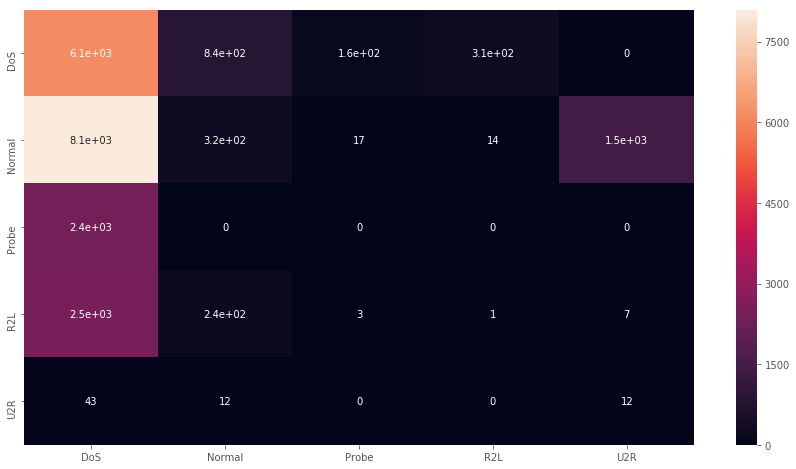

In [127]:
y_pred9 = gnb.predict(X_test)

cm =confusion_matrix(testClasses, y_pred9)  
index = ['DoS','Normal','Probe','R2L','U2R']  
columns = ['DoS','Normal','Probe','R2L','U2R']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)
plt.show()

In [122]:
ynew9 = gnb.predict(X_test)
print(confusion_matrix(testClasses,ynew9))
print(classification_report(testClasses,ynew9))
print(accuracy_score(testClasses, ynew9))

[[6149  842  159  310    0]
 [8090  316   17   14 1452]
 [2421    0    0    0    0]
 [2461  235    3    1    7]
 [  43   12    0    0   12]]
              precision    recall  f1-score   support

           0       0.32      0.82      0.46      7460
           1       0.22      0.03      0.06      9889
           2       0.00      0.00      0.00      2421
           3       0.00      0.00      0.00      2707
           4       0.01      0.18      0.02        67

    accuracy                           0.29     22544
   macro avg       0.11      0.21      0.11     22544
weighted avg       0.21      0.29      0.18     22544

0.28734918381831087


In [128]:
gnb_report = classification_report(testClasses,ynew9, output_dict=True )

In [130]:
gnb_accuracy = gnb_report['accuracy']
gnb_precision =  gnb_report['weighted avg']['precision'] 
gnb_recall = gnb_report['weighted avg']['recall']    
gnb_f1 = gnb_report['weighted avg']['f1-score']
print(gnb_accuracy,gnb_precision,gnb_recall,gnb_f1)

0.28734918381831087 0.2052276330500195 0.28734918381831087 0.17752341033718408


In [132]:
float(gnb_accuracy)

0.28734918381831087

| classifier | accuracy | precision | recall|F1score
| --- | --- | --- |---|----|
| GaussianNB | round(gnb_accuracy,2) | round(gnb_precision,2) |round(gnb_recall,2)|round(gnb_f1,2)|


In [134]:
round(gnb_accuracy,2)

0.29

In [137]:
from IPython.display import HTML, display
import tabulate
table = [["classifier","accuracy","precision","recall","F1score"],
        ["Deep Learning ('balanced')",round(deep_Learning_w_accuracy,2),round(deep_Learning_w_precision,2),
         round(deep_Learning_w_recall,2),round(deep_Learning_w_f1,2)],
        ["Deep Learning",round(deep_Learning_accuracy,2),round(deep_Learning_precision,2),round(deep_Learning_recall,2),
          round(deep_Learning_f1,2)],
        ["Logistic Regression ('balanced')",round(LR_w_accuracy,2),round(LR_w_precision,2),round(LR_w_recall,2),
          round(LR_w_f1,2)],
        ["Logistic Regression",round(LR_accuracy,2),round(LR_precision,2),round(LR_recall,2),
          round(LR_f1,2)],
        ["Decision Tree Classifier ('balanced')",round(clf2_accuracy,2),round(clf2_precision,2),round(clf2_recall,2),
          round(clf2_f1,2)],
        ["Decision Tree Classifier",round(clf_accuracy,2),round(clf_precision,2),round(clf_recall,2),
          round(clf_f1,2)],
         ["KNeighbors Classifier",round(knn_accuracy,2),round(knn_precision,2),round(knn_recall,2),
          round(knn_f1,2)],
         ["Linear Discriminant",round(lda_accuracy,2),round(lda_precision,2),round(lda_recall,2),
          round(lda_f1,2)],
         ["GaussianNB",round(gnb_accuracy,2),round(gnb_precision,2),round(gnb_recall,2),
          round(gnb_f1,2)]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

classifier,accuracy,precision,recall,F1score
Deep Learning ('balanced'),0.75,0.68,0.75,0.71
Deep Learning,0.7,0.66,0.7,0.65
Logistic Regression ('balanced'),0.44,0.54,0.44,0.47
Logistic Regression,0.64,0.54,0.64,0.57
Decision Tree Classifier ('balanced'),0.75,0.78,0.75,0.71
Decision Tree Classifier,0.77,0.82,0.77,0.74
KNeighbors Classifier,0.74,0.72,0.74,0.69
Linear Discriminant,0.76,0.81,0.76,0.74
GaussianNB,0.29,0.21,0.29,0.18
